## Machine Learning

### Laura Licerio

Calcula la primera derivada de las siguientes funciones:

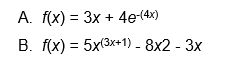

In [1]:
import sympy as sym
x = sym.symbols('x')


funcionA = 3*x + 4*sym.exp(-4*x) 
funcionA



3*x + 4*exp(-4*x)

In [2]:
derivada_funcionA = sym.diff(funcionA)
derivada_funcionA

3 - 16*exp(-4*x)

In [3]:
funcionB = 5*x**(3*x+1) - 8*x**2 - 3*x
funcionB

-8*x**2 - 3*x + 5*x**(3*x + 1)

In [4]:
derivada_funcionB = sym.diff(funcionB)
derivada_funcionB

-16*x + 5*x**(3*x + 1)*(3*log(x) + (3*x + 1)/x) - 3

Calcula la segunda derivada de las siguientes funciones:

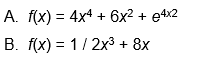

In [5]:
funcionC = 4*x**4 + 6*x**2 + sym.exp(4*x**2)
funcionC

4*x**4 + 6*x**2 + exp(4*x**2)

In [6]:
derivada2_funcionC = sym.diff(funcionC, x, 2)
derivada2_funcionC

4*(16*x**2*exp(4*x**2) + 12*x**2 + 2*exp(4*x**2) + 3)

In [7]:
funcionD = 1/2*x**3 + 8 * x
funcionD

0.5*x**3 + 8*x

In [8]:
derivada2_funcionD = sym.diff(funcionD,x,2)
derivada2_funcionD

3.0*x

Calcula las primeras derivadas parciales de las siguientes funciones:

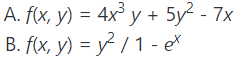

In [9]:
y = sym.symbols('y')
funcionE = 4*y*x**3  + 5*y**2 - 7*x
funcionE 

4*x**3*y - 7*x + 5*y**2

In [10]:
derivada_parcial_funcionE_x = sym.diff(funcionE,x)
derivada_parcial_funcionE_x

12*x**2*y - 7

In [11]:
derivada_parcial_funcionE_y = sym.diff(funcionE,y)
derivada_parcial_funcionE_y

4*x**3 + 10*y

In [12]:
funcionF = y**2 / (1 - sym.exp(x))
funcionF

y**2/(1 - exp(x))

In [13]:
derivada_parcial_funcionF_x = sym.diff(funcionF,x)
derivada_parcial_funcionF_x

y**2*exp(x)/(1 - exp(x))**2

In [14]:
derivada_parcial_funcionF_y = sym.diff(funcionF,y)
derivada_parcial_funcionF_y

2*y/(1 - exp(x))

Calcula las segundas derivadas parciales de las siguientes funciones:

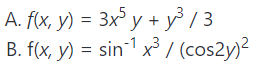

In [15]:
funcionG = 3*x**5*y + y**3/3
funcionG

3*x**5*y + y**3/3

In [16]:
derivada_parcial2_funcionG_x = sym.diff(funcionG,x,2)
derivada_parcial2_funcionG_x

60*x**3*y

In [17]:
derivada_parcial2_funcionG_y = sym.diff(funcionG,y,2)
derivada_parcial2_funcionG_y

2*y

In [18]:
funcionH = sym.asin(x**3) / (sym.cos(2*y))**2
funcionH

asin(x**3)/cos(2*y)**2

In [19]:
derivada_parcial2_funcionH_x = sym.diff(funcionH,x,2)
derivada_parcial2_funcionH_x

-3*x*(3*x**6/(x**6 - 1) - 2)/(sqrt(1 - x**6)*cos(2*y)**2)

In [20]:
derivada_parcial2_funcionH_y = sym.diff(funcionH,y,2)
derivada_parcial2_funcionH_y

8*(3*sin(2*y)**2/cos(2*y)**2 + 1)*asin(x**3)/cos(2*y)**2

Investiga sobre diferentes implementaciones del algoritmo de propagación inversa y construye un ejemplo en Python donde se compruebe su funcionamiento.

In [1]:

import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
data = load_iris()

print(data.target.shape)




(150,)


In [2]:
X=data.data
Y=data.target

#Code for randomly shuffling the dataset
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X)
from sklearn.utils import shuffle
X, X_sparse, y = shuffle(X, X_sparse, Y, random_state=0)
X=X_sparse.toarray()
Y=y

print(X.shape)

(150, 4)


In [3]:
Y=Y.reshape(150,1)

In [4]:
#Divivding the dataset into training and testing 
train_X=X[0:125,:]
train_Y=Y[0:125,:]
test_X=X[125:,:]
test_Y=Y[125:,:]

In [5]:
def sigmoid(x):
  for i in range(0,x.shape[0]):
    x[i]=1/(1+np.exp(-1*x[i]))
  return x

In [6]:
def diffSigmoid(x):
  for i in  range(0,len(x)):
    y=1/(1+np.exp(-1*x[i]))
    x[i]=y*(1-y)
  return x 

In [7]:
print(Y.shape)

(150, 1)


In [8]:
#Random initialization of Weights Matrices
#Model contains 4 layers having 4->8->8->3 neurons respectively
w12=np.random.rand(8,4)
b1=np.random.rand(8,1)
w23=np.random.rand(8,8)
b2=np.random.rand(8,1)
w34=np.random.rand(3,8)
b3=np.random.rand(3,1)

In [9]:
print(w23)

[[0.43560966 0.1204315  0.91911101 0.74404115 0.49354978 0.93093678
  0.20812365 0.04000107]
 [0.87945158 0.39099484 0.34627474 0.37327574 0.26712072 0.00933884
  0.107968   0.99362651]
 [0.78217126 0.50466338 0.311861   0.00732013 0.5844914  0.64940702
  0.74325946 0.17143597]
 [0.03830969 0.46723468 0.97538414 0.68431484 0.91418327 0.75051997
  0.21042765 0.67801291]
 [0.16072966 0.70142019 0.15033156 0.25336932 0.74471027 0.54389582
  0.9197769  0.8976741 ]
 [0.83576983 0.05068826 0.59744899 0.34834435 0.07325947 0.15849279
  0.92308751 0.86310316]
 [0.71747081 0.57963059 0.68042839 0.62285204 0.1828265  0.83857764
  0.42225992 0.14448586]
 [0.98451059 0.08253087 0.55164294 0.98754241 0.43860001 0.53765201
  0.09617749 0.42306352]]


In [10]:
def forwardPropagation(X,Y,dict2):
    dict ={}
    w12=dict2["w12"]
    w23=dict2["w23"]
    w34=dict2["w34"]
    b1=dict2["b1"]
    b2=dict2["b2"]
    b3=dict2["b3"]
    X=np.asarray(X)
    X=X.reshape((4,1))
    net1=np.dot(w12,X)+b1
    a1=sigmoid(net1)
    net2=np.dot(w23,a1)+b2
    a2=sigmoid(net2)
    net3=np.dot(w34,a2)+b3
    a3=sigmoid(net3)
    error=1/2*np.sum(pow((Y-a3),2))
    dict["a1"]=a1
    dict["a2"]=a2
    dict["a3"]=a3
    dict["net1"]=net1
    dict["net2"]=net2
    dict["net3"]=net3
    dict["err"]=error
    return dict

In [11]:
def Backpropagation(X,y,alpha,dict,dict2):
    a1=dict["a1"]
    a2=dict["a2"]
    a3=dict["a3"]
    net1=dict["net1"]
    net2=dict["net2"]
    net3=dict["net3"]
    error=dict["err"]
    w12=dict2["w12"]
    w23=dict2["w23"]
    w34=dict2["w34"]
    b1=dict2["b1"]
    b2=dict2["b2"]
    b3=dict2["b3"]
    y1=np.zeros((3,1))
    y1[y]=1
    a3=a3.reshape((3,1))
    a2=a2.reshape((8,1))
    a1=a1.reshape((8,1))
    X=np.asarray(X)
    X=X.reshape((4,1))
    temp=np.multiply(a3-y1,np.multiply(a3,np.ones(a3.shape)-a3))
    temp2=np.multiply(np.dot(temp.transpose(),w34).T,np.multiply(a2,np.ones(a2.shape)-a2))
    temp3=np.multiply(np.dot(temp2.transpose(),w23).T,np.multiply(a1,np.ones(a1.shape)-a1))
    w34=w34-(alpha)*(np.dot(temp,a2.T))
    b3=b3-(alpha)*temp 
    w23=w23-(alpha)*(np.dot(temp2,a1.T))
    b2=b2-(alpha)*temp2
    w12=w12-(alpha)*(np.dot(temp3,X.T))            
    b1=b1-(alpha)*(temp3)
    dict2["w12"]=w12
    dict2["w23"]=w23 
    dict2["w34"]=w34
    dict2["b1"]=b1
    dict2["b2"]=b2
    dict2["b3"]=b3
    return dict2

In [12]:
def main(X,y):
    max_iter=8000
    alpha=0.01
    weights={}
    cost_list=[]
    weights["w12"]=w12
    weights["w23"]=w23 
    weights["w34"]=w34
    weights["b1"]=b1
    weights["b2"]=b2
    weights["b3"]=b3
    weights['No_of_Iter']=max_iter
    while(True):
    for i in range(1,X.shape[0]):
        d1=forwardPropagation(X[i],y[i],weights)
        weights=Backpropagation(X[i],y[i],alpha,d1,weights)
        curr_error=d1["err"]
    max_iter=max_iter-1
    if(max_iter<0):
        break
    final=d1["err"]
    cost_list.append(final)
    weights['cost']=cost_list
    return weights

In [13]:
ans=main(train_X,train_Y)
u=ans["w23"]
print(u)

[[ 0.3711137   0.210595    1.00925114  0.83423247  0.58366689  0.93226643
   0.29850095  0.13036913]
 [10.21737304 -0.74855195 -0.78933322 -0.74578022 -0.86619994 -0.41454016
  -1.04540683 -0.15913803]
 [ 6.07298276 -0.34829419 -0.53444735 -0.80625151 -0.2434117   6.4428668
  -0.12703798 -0.69952115]
 [-0.03027677  0.49485593  1.0029458   0.71161755  0.94171685  0.7355124
   0.23825578  0.70583455]
 [ 0.0620945   0.78226507  0.23091354  0.33249032  0.82476781  0.47440211
   1.0012094   0.97912371]
 [ 0.86493257 -0.1147134   0.43229828  0.18476735 -0.09237244 -0.36129333
   0.75732399  0.69738785]
 [ 0.66322883  0.74487072  0.84534256  0.78595164  0.34716254  0.84556887
   0.58821179  0.31045501]
 [ 0.96701033  0.13039573  0.59960563  1.03618948  0.48675649  0.55760999
   0.14398975  0.47086047]]


In [14]:
from sklearn.metrics import mean_squared_error
pred=forwardPropagation(test_X[19],test_Y[19],ans);
print(pred["a3"])
print(test_Y[19])

[[9.79955244e-01]
 [2.16595461e-02]
 [6.64860742e-04]]
[0]


In [16]:
test_X.shape

(25, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

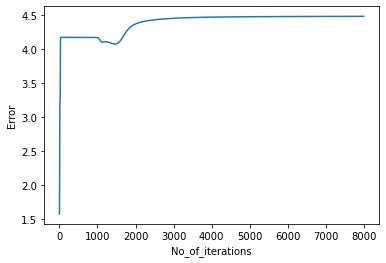

In [17]:
i=ans['No_of_Iter']
iter=np.arange(0,i)
error=ans['cost']
plt.plot(iter,error)
plt.xlabel('No_of_iterations')
plt.ylabel('Error')
plt.show

Dada la siguiente situación:

Los dispositivos electrónicos que se construían a base de transistores en la década de 1990 presentaban dos tipos de fallas principales: la fuente de alimentación y el circuito principal (tarjeta principal). Según las estadísticas de esa época, un taller promedio recibía de manera mensual un 30% de equipos con afectaciones en la fuente de alimentación y la efectividad de la reparación de un equipo era de un 75% si la falla estaba localizada en el circuito principal.

Calcula la probabilidad de que un equipo que no tuviera reparación hubiera ingresado al taller por problemas en la tarjeta principal. Implementa tu respuesta mediante código en un Jupyter Notebook de Python.


In [21]:
import numpy as np

P_rec_falla_FA = 0.3
P_rec_falla_TP = 0.7
P_inefectividad_TP = 0.25

def p(p1, p2):
    p = p1 * p2
    return p

p(P_rec_falla_TP, P_inefectividad_TP)

    
    

0.175

Importa a tu espacio de trabajo el siguiente dataset: https://www.kaggle.com/elikplim/forest-fires-data-set

In [22]:
import pandas as pd
filename = 'forestfires.csv'
data = pd.read_csv(filename, header=0)

print(data.shape)
print (data.head(10))


(517, 13)
   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Crea un arreglo que contenga los valores de la columna etiquetada por: #temp.

Construye el histograma referente al arreglo creado en el punto anterior.

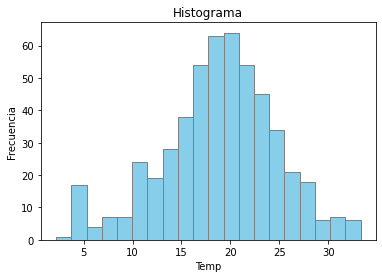

In [24]:
import matplotlib.pyplot as plt
plt.hist(data['temp'], 20 , color = 'skyblue', ec='gray')
plt.ylabel('Frecuencia')
plt.xlabel('Temp')
plt.title('Histograma')
plt.show()

Evalúa si la gráfica obtenida tiene semejanzas con la distribución normal y obtén la media, la mediana y la desviación estándar de los datos

In [25]:
#Si tiene semejanzas con la distribución normal.

media = np.mean(data['temp'])
print(media)
mediana = np.median(data['temp'])
print(mediana)
desviacion_estandar = data['temp'].std()
print(desviacion_estandar)


18.88916827852998
19.3
5.806625349573503


Dibuja la gráfica de la distribución gaussiana inferida por los datos, en caso de que corresponda, y evalúa la suposición realizada en el punto anterior.

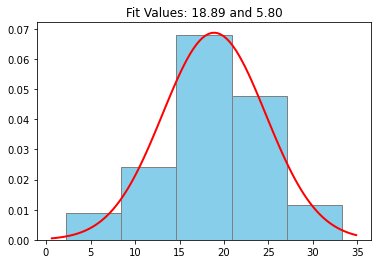

In [74]:
from scipy.stats import norm

#dist_normal = 1/(desviacion_estandar * np.sqrt(2 * np.pi)) *np.exp(-(bins - media)**2 / (2 * desviacion_estandar**2) )

datos = data['temp']
media, desviacion_estandar = norm.fit (datos)

plt.hist(datos , color = 'skyblue', ec='gray', bins= 5, density=True)

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desviacion_estandar )

plt.plot(x, p, 'k', linewidth=2 , color = 'red')
title = "Fit Values: {:.2f} and {:.2f}".format(media, desviacion_estandar)
plt.title(title)

plt.show()
#print (dist_normal)
